<a href="https://colab.research.google.com/github/ChetanJadhav2341/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import math

In [ ]:
path="/content/drive/MyDrive/Capstone Project-Supervised ML (Regression)-(Bike Sharing Demand Prediction)/SeoulBikeData.csv"
df = pd.read_csv(path, encoding='ISO-8859-1')

In [ ]:
# First look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Describe both numerical and categorical data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
#Lets check the Rented Bike Count for more than 75 percentile
df.describe(include='all', percentiles=[.25, .50, .75, .95,.99])

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
df[df['Rented Bike Count']>2500]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3282,16/04/2018,2692,18,17.0,28,3.1,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,Yes
3498,25/04/2018,2807,18,21.2,32,3.8,1927,3.8,0.94,0.0,0.0,Spring,No Holiday,Yes
3522,26/04/2018,2574,18,17.4,45,3.1,1092,5.3,0.75,0.0,0.0,Spring,No Holiday,Yes
3546,27/04/2018,2577,18,20.3,47,2.5,705,8.6,0.77,0.0,0.0,Spring,No Holiday,Yes
3618,30/04/2018,2558,18,23.0,54,2.9,679,13.1,0.81,0.0,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,16/10/2018,2716,18,16.9,47,1.4,1637,5.5,0.11,0.0,0.0,Autumn,No Holiday,Yes
7746,19/10/2018,2631,18,16.6,40,2.4,2000,2.9,0.11,0.0,0.0,Autumn,No Holiday,Yes
7818,22/10/2018,2613,18,17.3,43,0.9,783,4.5,0.08,0.0,0.0,Autumn,No Holiday,Yes
7866,24/10/2018,2612,18,15.1,53,1.7,2000,5.5,0.06,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df[df['Rented Bike Count']==0]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


In [ ]:
# Lets import DatetimeIndex to extract Date column
import datetime as dt

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
# Extracting year, day, month and weekdays from the date column
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Day'] = pd.DatetimeIndex(df['Date']).day
df["Month"]=df["Date"].dt.month_name()
df['weekday']=df["Date"].dt.day_name()

In [ ]:
df['weekday'].unique()

array(['Thursday', 'Sunday', 'Wednesday', 'Friday', 'Monday', 'Saturday',
       'Tuesday'], dtype=object)

In [ ]:
(df['Solar Radiation (MJ/m2)'].value_counts()/ len(df['Solar Radiation (MJ/m2)']))*100

0.00    49.086758
0.01     1.461187
0.02     0.936073
0.03     0.787671
0.06     0.696347
          ...    
3.38     0.011416
2.97     0.011416
3.44     0.011416
3.49     0.011416
3.45     0.011416
Name: Solar Radiation (MJ/m2), Length: 345, dtype: float64

In [ ]:
df.drop('Solar Radiation (MJ/m2)', axis = 1, inplace = True)

In [ ]:
df["label_day_night"]=df["Hour"].apply(lambda x: 'Night' if(x>20 or x< 5) else ('Day'))
df["label_day_night"].value_counts()

Day      5840
Night    2920
Name: label_day_night, dtype: int64

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Year', 'Day', 'Month', 'weekday',
       'label_day_night'],
      dtype='object')

In [ ]:
# Duplicate
len(df[df.duplicated()])

0

In [ ]:
# Numeric Features
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Year', 'Day'],
      dtype='object')

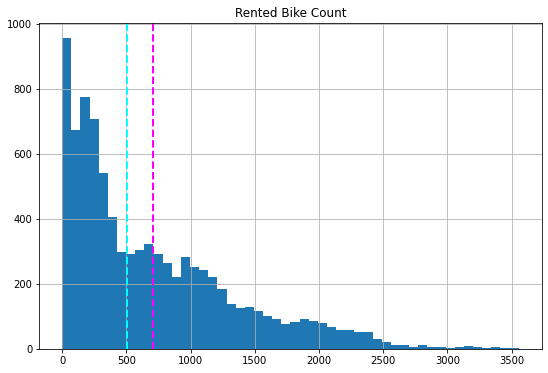

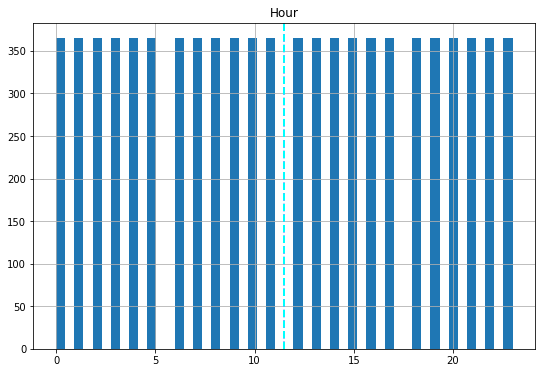

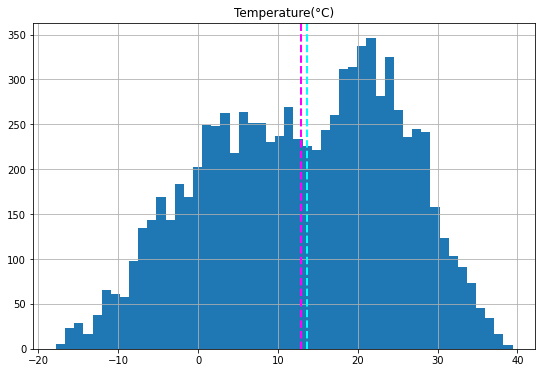

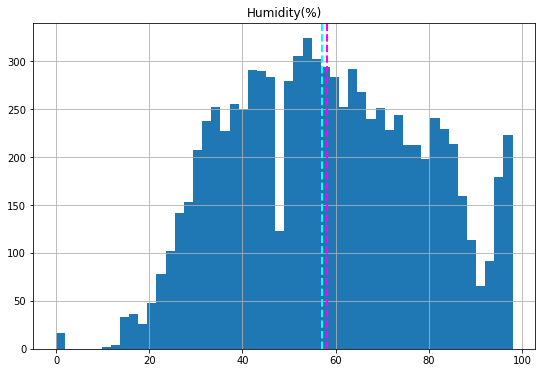

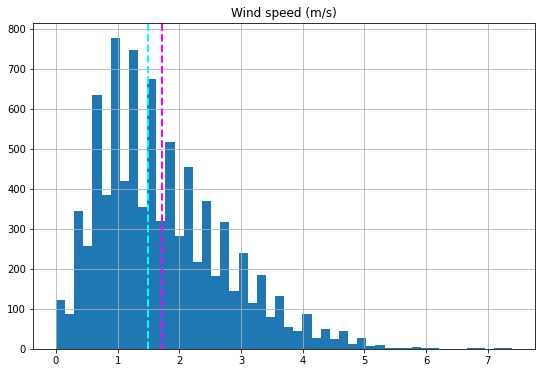

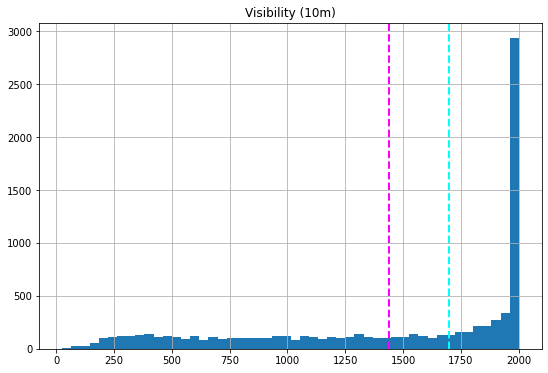

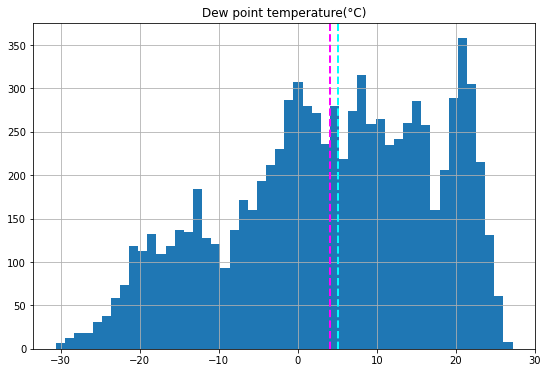

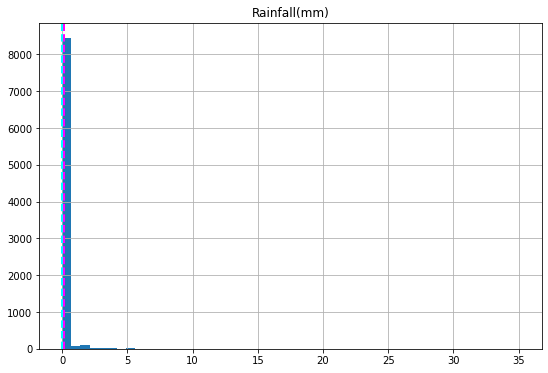

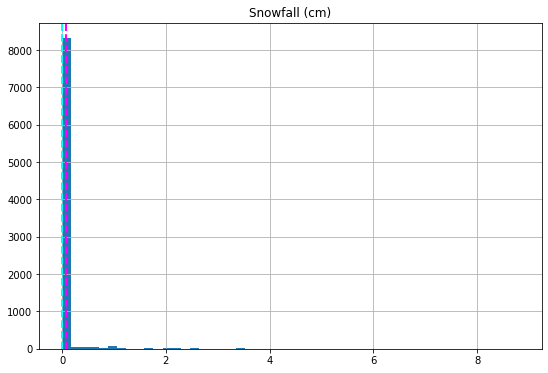

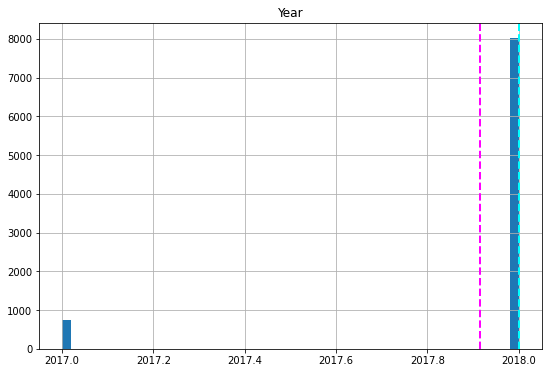

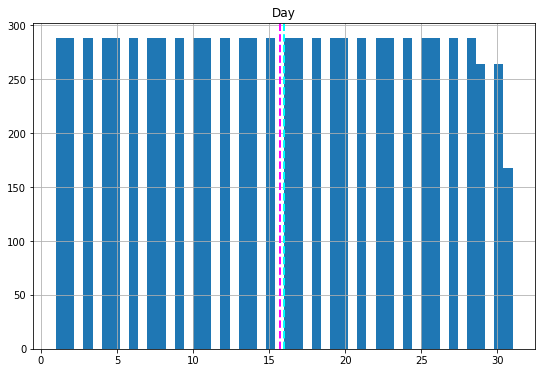

In [ ]:
# Ploting of each numeric features
for col in numeric_features[:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(),color = 'magenta', linestyle = 'dashed', linewidth = 2)
  ax.axvline(feature.median(),color = 'cyan', linestyle = 'dashed', linewidth = 2)
  ax.set_title(col)
plt.show()

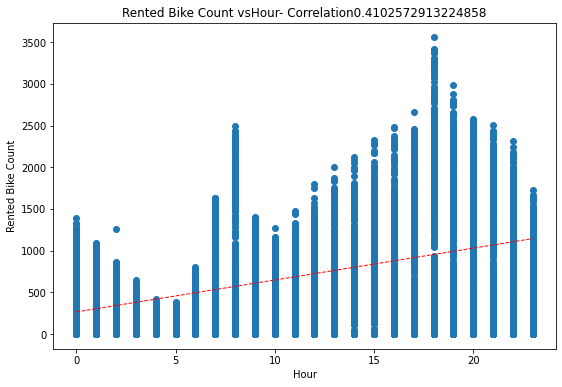

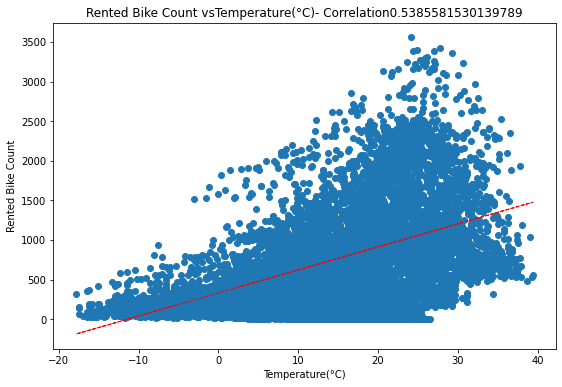

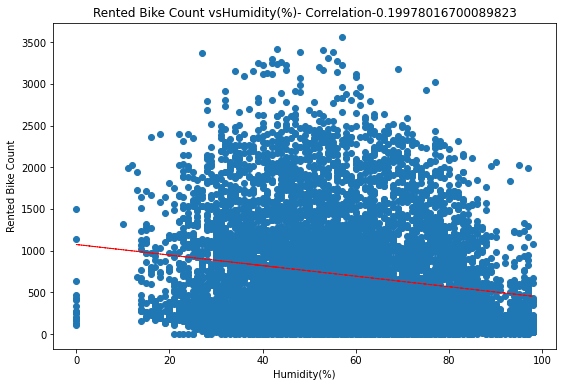

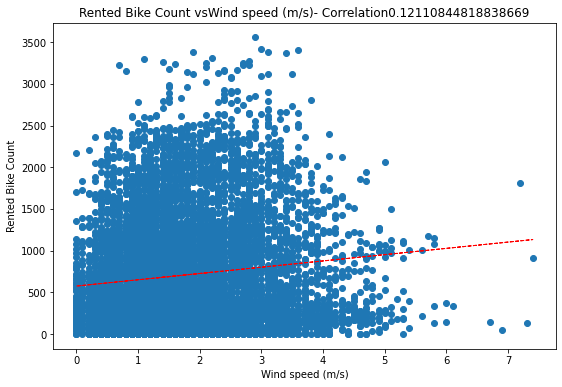

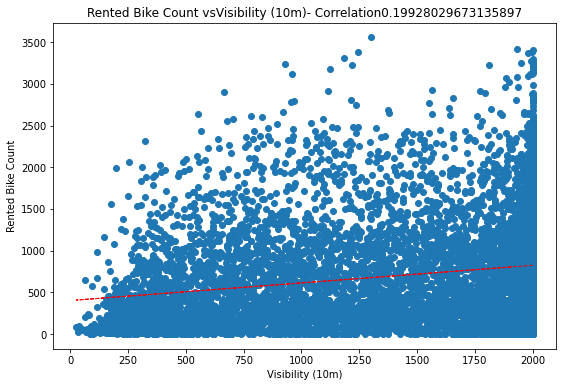

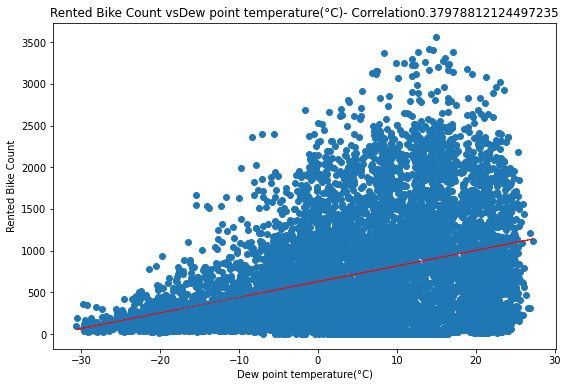

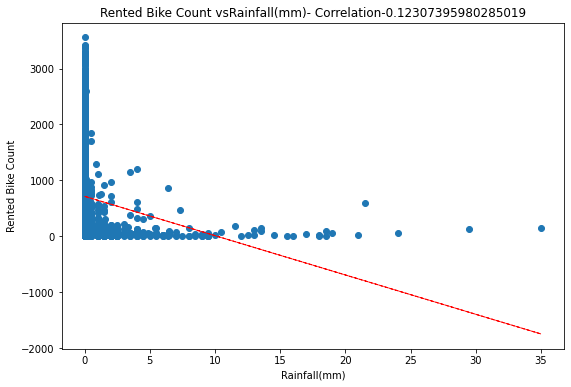

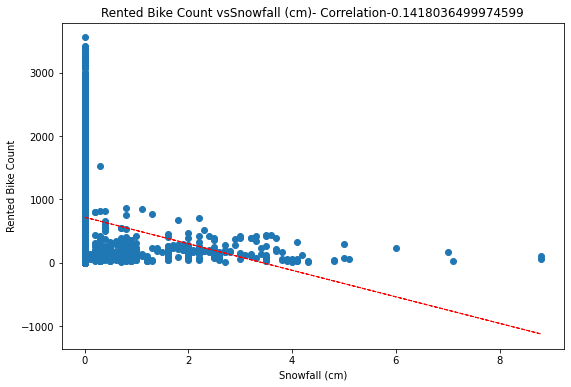

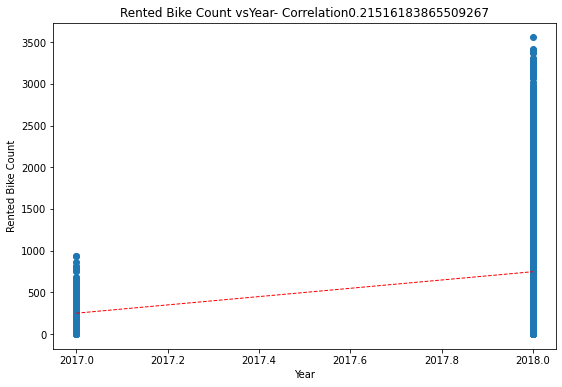

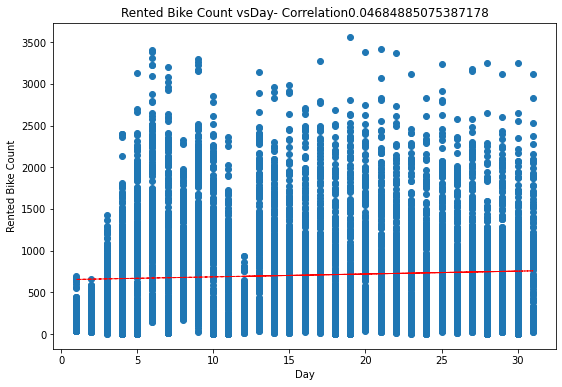

In [ ]:
for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x = feature, y = label)
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs'+ col + '- Correlation' + str(correlation))
  z = np.polyfit(df[col],df['Rented Bike Count'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col],y_hat,'r--',lw=1)
plt.show()

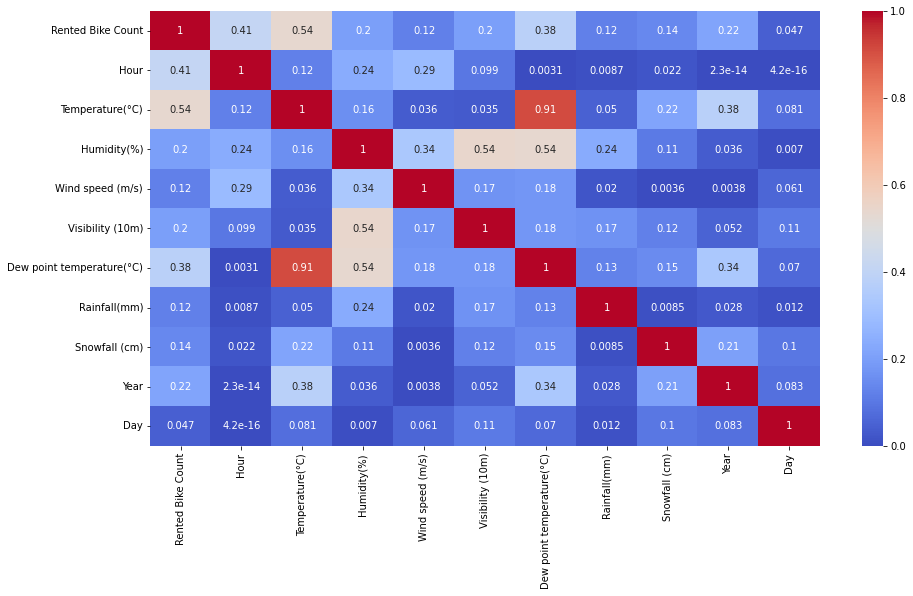

In [ ]:
# Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**EDA** (Exploratory Data Analysis)

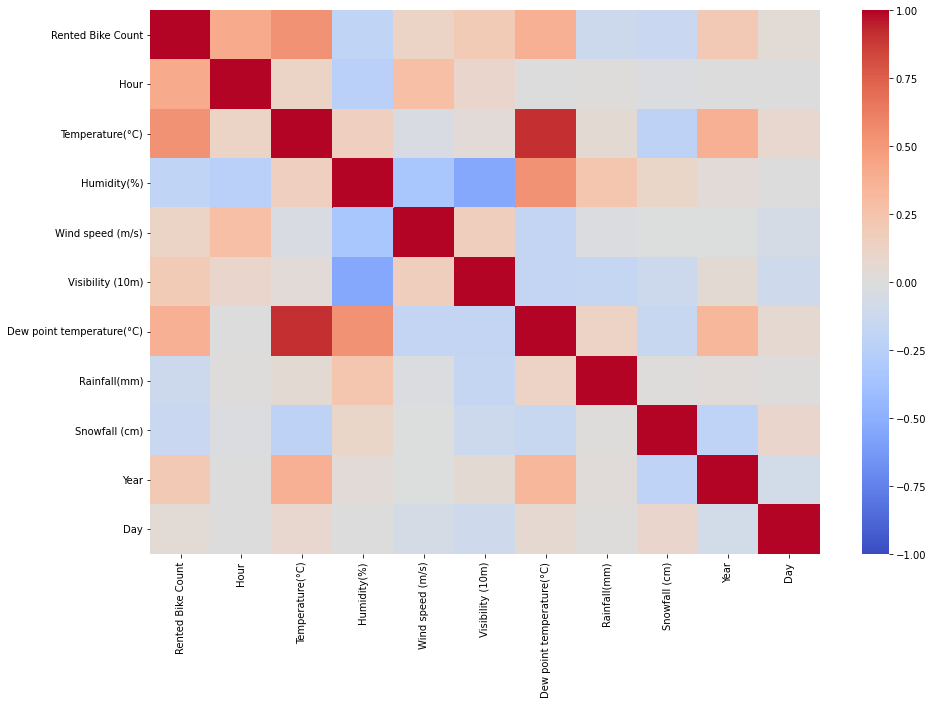

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm')

In [ ]:
# dropping Dew point temperature column from the dataset
df.drop('Dew point temperature(°C)', axis = 1, inplace = True)

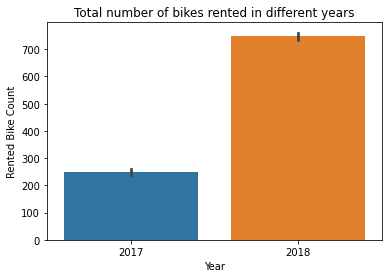

In [ ]:
sns.barplot(x = 'Year', y = 'Rented Bike Count', data = df)
plt.title("Total number of bikes rented in different years")
plt.show()

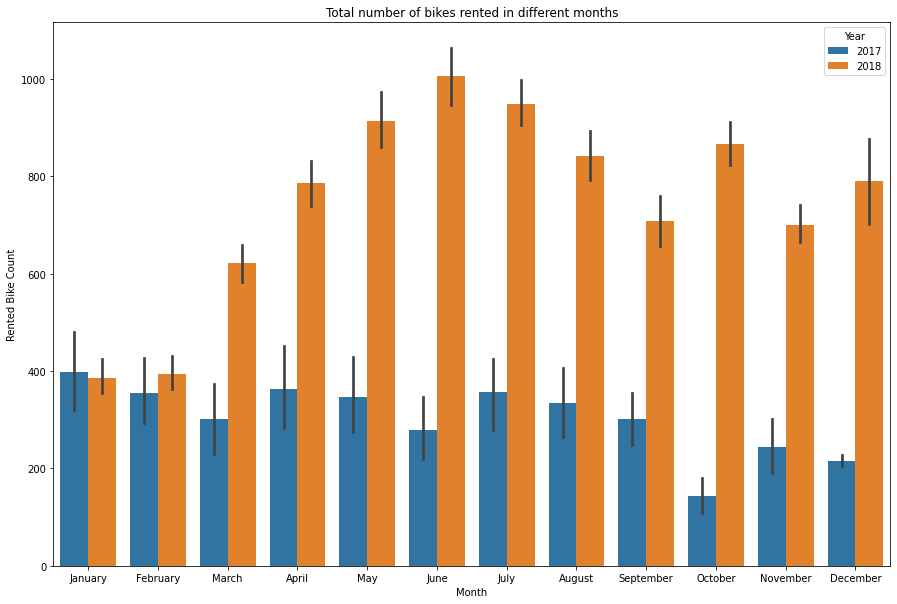

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Month', y = 'Rented Bike Count', data = df, hue = 'Year')
plt.title("Total number of bikes rented in different months")
plt.show()

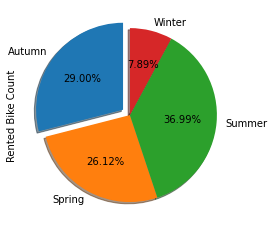

In [ ]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie(startangle=90, shadow=True,explode=(0.1, 0, 0, 0), autopct='%1.2f%%')


Let's visualize the categorical variables
For better understanding lets subplot for 1.Seasons, 2.Holiday, 3.Functioning_Day, 4.Month, 5.Weekday, 6.Label_day_night

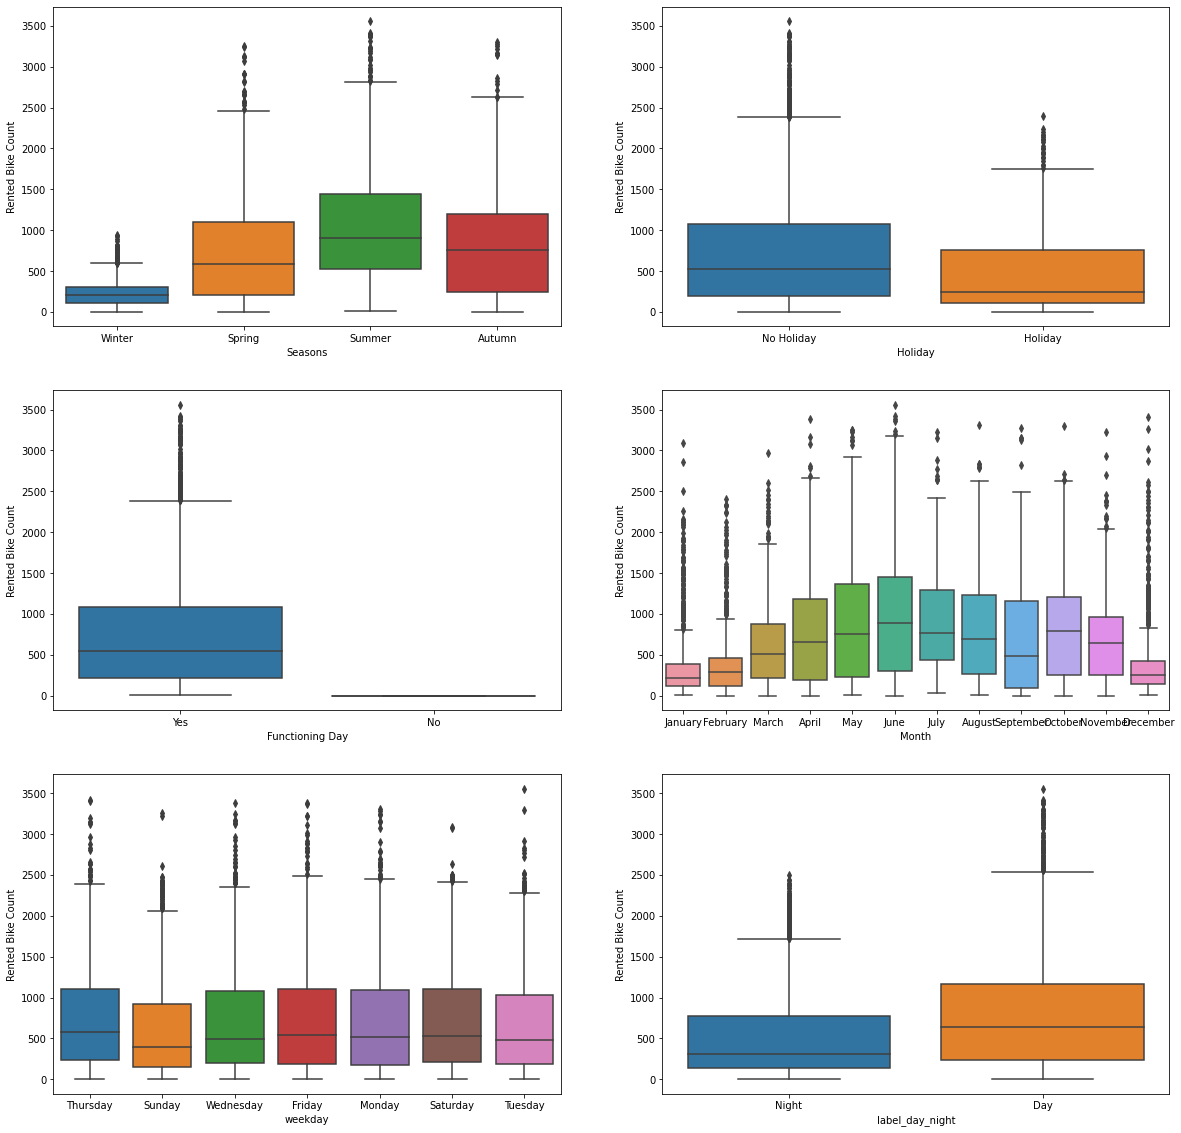

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'Seasons', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'Holiday', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,3)
sns.boxplot(x = 'Functioning Day', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,4)
sns.boxplot(x = 'Month', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,6)
sns.boxplot(x = 'label_day_night', y = 'Rented Bike Count', data = df)

<Figure size 1080x720 with 0 Axes>

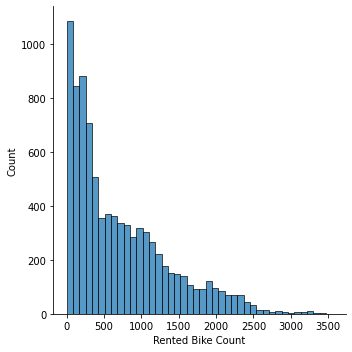

In [ ]:

# To perform EDA on dependent variable.
plt.figure(figsize=(15,10))
sns.displot(df['Rented Bike Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


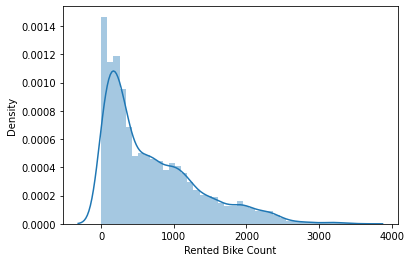

In [ ]:
sns.distplot(df['Rented Bike Count'])

In [ ]:
x = df['Rented Bike Count']
x.skew()

1.1534281773679014

In [ ]:

x = np.log(df['Rented Bike Count'])
x.skew()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

In [ ]:
a = (np.sqrt(df['Rented Bike Count']))
a.skew()

0.237362090985412

In [ ]:
#plt.figure(figsize=(7,7))
#sns.displot(np.log10(df['Rented Bike Count']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


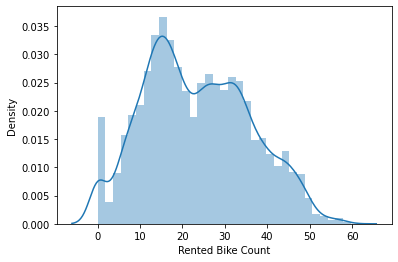

In [ ]:
sns.distplot(np.sqrt(df['Rented Bike Count']))


**Model Preparation** 

In [ ]:
bike_df = df.copy()

In [ ]:
df1Corr=pd.DataFrame(bike_df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation value to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,Correlation value to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Year,0.215162
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Day,0.046849
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


In [ ]:
# Create dummy variables for the catgeorical variable State
status = pd.get_dummies(bike_df['Seasons'], drop_first=True)
status1 = pd.get_dummies(bike_df['Holiday'], drop_first=True)
status2 = pd.get_dummies(bike_df['Functioning Day'], drop_first=True)
status3 = pd.get_dummies(bike_df['weekday'], drop_first=True)
status4 = pd.get_dummies(bike_df['Month'], drop_first=True)
status5 = pd.get_dummies(bike_df['label_day_night'], drop_first=True)

In [ ]:
bike_df=pd.concat([bike_df,status,status1, status2, status3, status4, status5], axis =1)

In [ ]:
bike_df.drop(["Holiday","Seasons","Functioning Day","weekday","Month","label_day_night","Day","Year"], axis=1, inplace=True)

In [ ]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Spring,...,February,January,July,June,March,May,November,October,September,Night
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
dependent_variable = 'Rented Bike Count'

In [ ]:
# Create a list of independent variables
independent_variables = list(set(bike_df.columns.tolist()) - {dependent_variable})
(independent_variables)

['Spring',
 'September',
 'Summer',
 'Date',
 'Winter',
 'Wind speed (m/s)',
 'February',
 'January',
 'Sunday',
 'Thursday',
 'Visibility (10m)',
 'Wednesday',
 'Rainfall(mm)',
 'October',
 'December',
 'Saturday',
 'Hour',
 'Snowfall (cm)',
 'November',
 'June',
 'Temperature(°C)',
 'Tuesday',
 'Night',
 'May',
 'Monday',
 'July',
 'Yes',
 'August',
 'Humidity(%)',
 'No Holiday',
 'March']

In [ ]:
# Create the data of independent variables
X = bike_df[independent_variables].values

In [ ]:
# Create the dependent variable data
y = np.sqrt(bike_df[dependent_variable].values)

In [ ]:
bike_df[independent_variables]

,Spring,September,Summer,Date,Winter,Wind speed (m/s),February,January,Sunday,Thursday,...,Tuesday,Night,May,Monday,July,Yes,August,Humidity(%),No Holiday,March
0,0,0,0,2017-01-12,1,2.2,0,1,0,1,...,0,1,0,0,0,1,0,37,1,0
1,0,0,0,2017-01-12,1,0.8,0,1,0,1,...,0,1,0,0,0,1,0,38,1,0
2,0,0,0,2017-01-12,1,1.0,0,1,0,1,...,0,1,0,0,0,1,0,39,1,0
3,0,0,0,2017-01-12,1,0.9,0,1,0,1,...,0,1,0,0,0,1,0,40,1,0
4,0,0,0,2017-01-12,1,2.3,0,1,0,1,...,0,1,0,0,0,1,0,36,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,2018-11-30,0,2.6,0,0,0,0,...,0,0,0,0,0,1,0,34,1,0
8756,0,0,0,2018-11-30,0,2.3,0,0,0,0,...,0,0,0,0,0,1,0,37,1,0
8757,0,0,0,2018-11-30,0,0.3,0,0,0,0,...,0,1,0,0,0,1,0,39,1,0
8758,0,0,0,2018-11-30,0,1.0,0,0,0,0,...,0,1,0,0,0,1,0,41,1,0


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [ ]:
bike_df_train.size

196224

In [ ]:
bike_df_test.size

84096

**Rescaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
num_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)', 'Rented Bike Count',"Wind speed (m/s)","Visibility (10m)","Rainfall(mm)","Snowfall (cm)"]
scaler = MinMaxScaler()
bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])
bike_df_train.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Spring,...,February,January,July,June,March,May,November,October,September,Night
5584,2018-07-21,0.248313,0.695652,0.955986,0.306122,0.378378,0.876330,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
5308,2018-10-07,0.037402,0.173913,0.670775,0.989796,0.067568,0.994425,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
5446,2018-07-15,0.451912,0.956522,0.792254,0.785714,0.121622,0.887481,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
7554,2018-11-10,0.668729,0.782609,0.521127,0.408163,0.324324,0.926001,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
3290,2018-04-17,0.066648,0.086957,0.455986,0.459184,0.121622,0.993411,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y_train = bike_df_train.pop('Rented Bike Count')
X_train = bike_df_train.drop('Date', axis=1)


In [ ]:

# Importing RFE and LinearRegression
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             
rfe = rfe.fit(X_train, y_train)

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Visibility (10m)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Spring', 'Summer', 'Winter',
       'No Holiday', 'Yes', 'June', 'May', 'October', 'Night'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['Wind speed (m/s)', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'August', 'December', 'February', 'January',
       'July', 'March', 'November', 'September'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     513.8
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:49:27   Log-Likelihood:                 4314.9
No. Observations:                6132   AIC:                            -8598.
Df Residuals:                    6116   BIC:                            -8490.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2653      0.019  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train_new = X_train_rfe.drop(['Rainfall(mm)'], axis=1)

In [ ]:

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     526.2
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:49:27   Log-Likelihood:                 4238.4
No. Observations:                6132   AIC:                            -8447.
Df Residuals:                    6117   BIC:                            -8346.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2572      0.019  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [ ]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Yes,25.64
1,Temperature(°C),23.03
8,No Holiday,18.28
2,Humidity(%),11.99
3,Visibility (10m),7.66
0,Hour,4.22
7,Winter,3.39
6,Summer,3.34
5,Spring,2.47
13,Night,1.70


In [ ]:
X_train_new = X_train_new.drop(["Yes"],axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     440.0
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:49:27   Log-Likelihood:                 3838.7
No. Observations:                6132   AIC:                            -7649.
Df Residuals:                    6118   BIC:                            -7555.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0123      0.018  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Temperature(°C),21.44
8,No Holiday,17.04
2,Humidity(%),10.76
3,Visibility (10m),7.02
0,Hour,4.20
6,Summer,3.33
7,Winter,2.67
5,Spring,2.25
12,Night,1.70
10,May,1.26


In [ ]:
X_train_new = X_train_new.drop(['Temperature(°C)'], axis=1)

In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     422.2
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:49:28   Log-Likelihood:                 3664.5
No. Observations:                6132   AIC:                            -7303.
Df Residuals:                    6119   BIC:                            -7216.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2186      0.014  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,No Holiday,15.56
1,Humidity(%),8.64
2,Visibility (10m),5.85
0,Hour,3.67
5,Summer,2.36
4,Spring,2.24
6,Winter,1.98
11,Night,1.67
8,June,1.24
9,May,1.24


In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     422.2
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:49:28   Log-Likelihood:                 3664.5
No. Observations:                6132   AIC:                            -7303.
Df Residuals:                    6119   BIC:                            -7216.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2186      0.014  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
y_train_cnt = lm.predict(X_train_lm)

In [ ]:
num_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)', 'Rented Bike Count',"Wind speed (m/s)","Visibility (10m)","Rainfall(mm)","Snowfall (cm)"]
bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])

In [ ]:
y_test = bike_df_test.pop('Rented Bike Count')
X_test = bike_df_test

In [ ]:
# using model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
y_pred = lm.predict(X_test_new)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-square:',round(100*(r2_score(y_test,y_pred))))

MAE: 0.10240573969268503
MSE: 0.01841953917790642
RMSE: 0.13571860291760457
R-square: 46


Text(0.5, 6.79999999999999, 'Errors')

<Figure size 432x288 with 0 Axes>

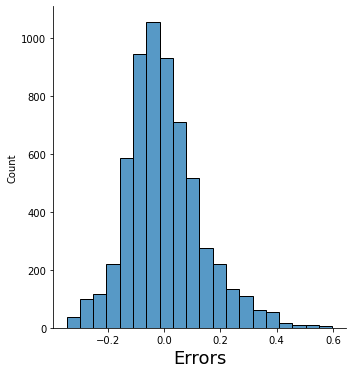

In [ ]:
fig = plt.figure()
sns.displot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)

In [ ]:
def score(y_pred, y_true):
  #Evaluates The Model With RMLSE
  error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
  score = 1 - error
  return score

In [ ]:

score(y_test,y_pred)

0.953713390061428

**Decission Tree Regressor Model**

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday,label_day_night
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday,Night


In [ ]:
# Create dummy variables for the catgeorical variable State
Status = pd.get_dummies(df['Seasons'], drop_first=True)
Status1 = pd.get_dummies(df['Holiday'], drop_first=True)
Status2 = pd.get_dummies(df['Functioning Day'], drop_first=True)
Status3 = pd.get_dummies(df['weekday'], drop_first=True)
Status4 = pd.get_dummies(df['Month'], drop_first=True)
Status5 = pd.get_dummies(df['label_day_night'], drop_first=True)

In [ ]:
# Lets concatenate the dummy variables in the Dataset
df=pd.concat([df,Status,Status1, Status2, Status3, Status4, Status5], axis =1)

In [ ]:
# Drop the original column State from the dataframe
df.drop(["Holiday","Seasons","Functioning Day", "weekday","Month", "label_day_night","Day","Year",'Date'], axis=1, inplace=True)


In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Spring,Summer,...,February,January,July,June,March,May,November,October,September,Night
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1


**Let's Split the Data**

In [ ]:
#x = indepenedent variables, y = dependent variables
x = df.drop('Rented Bike Count',axis=1)
y = np.sqrt(df['Rented Bike Count'])
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,...,February,January,July,June,March,May,November,October,September,Night
0,0,-5.2,37,2.2,2000,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
a_train, a_test, b_train, b_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(a_train.shape)
print(b_train.shape)
print(a_test.shape)
print(b_test.shape)

(7008, 30)
(7008,)
(1752, 30)
(1752,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as met
for min_sam_leaf in range(1,50):
  DT_reg = DecisionTreeRegressor(criterion='mse',min_samples_leaf=min_sam_leaf)
  DT_reg.fit(a_train,b_train)
  print(f"\nR-sqared on train dataset when min leaf {min_sam_leaf} : {met.r2_score(b_train,DT_reg.predict(a_train))}")
  print(f"R-sqared on test dataset when min leaf {min_sam_leaf}: {met.r2_score(b_test,DT_reg.predict(a_test))}")
  print(f"Mean absolute error on test dataset when min leaf {min_sam_leaf}: {met.mean_absolute_error(b_test,DT_reg.predict(a_test))}")
  print(f"Mean squared error on test dataset when min leaf {min_sam_leaf}: {met.mean_squared_error(b_test,DT_reg.predict(a_test))}")



R-sqared on train dataset when min leaf 1 : 1.0
R-sqared on test dataset when min leaf 1: 0.844263792900454
Mean absolute error on test dataset when min leaf 1: 3.2319993146248245
Mean squared error on test dataset when min leaf 1: 24.526312363117633


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,



R-sqared on train dataset when min leaf 2 : 0.9855772073094543
R-sqared on test dataset when min leaf 2: 0.8548336239385461
Mean absolute error on test dataset when min leaf 2: 3.1064464523353448
Mean squared error on test dataset when min leaf 2: 22.861709233930597

R-sqared on train dataset when min leaf 3 : 0.9711330707461239
R-sqared on test dataset when min leaf 3: 0.8689330606699862
Mean absolute error on test dataset when min leaf 3: 3.0163726538997953
Mean squared error on test dataset when min leaf 3: 20.641241714786016


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,



R-sqared on train dataset when min leaf 4 : 0.9598572713352763
R-sqared on test dataset when min leaf 4: 0.8673628288551943
Mean absolute error on test dataset when min leaf 4: 3.025161156744398
Mean squared error on test dataset when min leaf 4: 20.88853164619853

R-sqared on train dataset when min leaf 5 : 0.9500553139516148
R-sqared on test dataset when min leaf 5: 0.8600303143144935
Mean absolute error on test dataset when min leaf 5: 3.111535225467627
Mean squared error on test dataset when min leaf 5: 22.043301916912633

R-sqared on train dataset when min leaf 6 : 0.9426905740087671
R-sqared on test dataset when min leaf 6: 0.8627875530521529
Mean absolute error on test dataset when min leaf 6: 3.1159442107796638


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Mean squared error on test dataset when min leaf 6: 21.609074707974006

R-sqared on train dataset when min leaf 7 : 0.9365841805187143
R-sqared on test dataset when min leaf 7: 0.8612057944221443
Mean absolute error on test dataset when min leaf 7: 3.139585076578451
Mean squared error on test dataset when min leaf 7: 21.85817995437218

R-sqared on train dataset when min leaf 8 : 0.9307094628785332
R-sqared on test dataset when min leaf 8: 0.866087058179895
Mean absolute error on test dataset when min leaf 8: 3.0999651061397464
Mean squared error on test dataset when min leaf 8: 21.08944799486815


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,



R-sqared on train dataset when min leaf 9 : 0.9257497510371921
R-sqared on test dataset when min leaf 9: 0.8707445033885999
Mean absolute error on test dataset when min leaf 9: 3.0496297947084696
Mean squared error on test dataset when min leaf 9: 20.355964380940236

R-sqared on train dataset when min leaf 10 : 0.921312677148319
R-sqared on test dataset when min leaf 10: 0.8719526758390628
Mean absolute error on test dataset when min leaf 10: 3.067081886319089
Mean squared error on test dataset when min leaf 10: 20.165693823691935

R-sqared on train dataset when min leaf 11 : 0.9175612559169322
R-sqared on test dataset when min leaf 11: 0.8724953641984666
Mean absolute error on test dataset when min leaf 11: 3.044890982610782
Mean squared error on test dataset when min leaf 11: 20.08022786515566


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,



R-sqared on train dataset when min leaf 12 : 0.9157050921189248
R-sqared on test dataset when min leaf 12: 0.871501878430488
Mean absolute error on test dataset when min leaf 12: 3.06482175205519
Mean squared error on test dataset when min leaf 12: 20.23668822031367

R-sqared on train dataset when min leaf 13 : 0.9107236956019267
R-sqared on test dataset when min leaf 13: 0.8730184313878939
Mean absolute error on test dataset when min leaf 13: 3.034834422411467
Mean squared error on test dataset when min leaf 13: 19.99785197124043

R-sqared on train dataset when min leaf 14 : 0.9069088738493942
R-sqared on test dataset when min leaf 14: 0.874403163916305
Mean absolute error on test dataset when min leaf 14: 3.022292356421845
Mean squared error on test dataset when min leaf 14: 19.779775628149135

R-sqared on train dataset when min leaf 15 : 0.904519928409573
R-sqared on test dataset when min leaf 15: 0.872956017728892
Mean absolute error on test dataset when min leaf 15: 3.03936775617

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Mean squared error on test dataset when min leaf 15: 20.007681264793412

R-sqared on train dataset when min leaf 16 : 0.9017307252782919
R-sqared on test dataset when min leaf 16: 0.8735795030211871
Mean absolute error on test dataset when min leaf 16: 3.0567250416153104
Mean squared error on test dataset when min leaf 16: 19.909490899704654

R-sqared on train dataset when min leaf 17 : 0.8993392982536519
R-sqared on test dataset when min leaf 17: 0.8726287197240866
Mean absolute error on test dataset when min leaf 17: 3.069949641150862
Mean squared error on test dataset when min leaf 17: 20.05922620255184

R-sqared on train dataset when min leaf 18 : 0.897919394546466
R-sqared on test dataset when min leaf 18: 0.8731582049339367
Mean absolute error on test dataset when min leaf 18: 3.070657528867167
Mean squared error on test dataset when min leaf 18: 19.97583955862174

R-sqared on train dataset when min leaf 19 : 0.8944107575516076
R-sqared on test dataset when min leaf 19: 0.8642005

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

Mean squared error on test dataset when min leaf 19: 21.386539700076142

R-sqared on train dataset when min leaf 20 : 0.891759893757403
R-sqared on test dataset when min leaf 20: 0.8607707715810353
Mean absolute error on test dataset when min leaf 20: 3.182044350376441
Mean squared error on test dataset when min leaf 20: 21.926690073405126

R-sqared on train dataset when min leaf 21 : 0.8908335798987495
R-sqared on test dataset when min leaf 21: 0.8619178283667899
Mean absolute error on test dataset when min leaf 21: 3.1689499775865246
Mean squared error on test dataset when min leaf 21: 21.74604439344665

R-sqared on train dataset when min leaf 22 : 0.8896109107980903
R-sqared on test dataset when min leaf 22: 0.8581691443138071
Mean absolute error on test dataset when min leaf 22: 3.2201070903534266
Mean squared error on test dataset when min leaf 22: 22.336410614291662

R-sqared on train dataset when min leaf 23 : 0.88833701012981
R-sqared on test dataset when min leaf 23: 0.8587047

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 


R-sqared on train dataset when min leaf 24 : 0.8869611041186884
R-sqared on test dataset when min leaf 24: 0.8591619138943116
Mean absolute error on test dataset when min leaf 24: 3.2215981616899794
Mean squared error on test dataset when min leaf 24: 22.18006304881839

R-sqared on train dataset when min leaf 25 : 0.885804681807205
R-sqared on test dataset when min leaf 25: 0.8581031675133327
Mean absolute error on test dataset when min leaf 25: 3.2536671234708225
Mean squared error on test dataset when min leaf 25: 22.34680105365891

R-sqared on train dataset when min leaf 26 : 0.8846751604932918
R-sqared on test dataset when min leaf 26: 0.85771690806598
Mean absolute error on test dataset when min leaf 26: 3.267435353375319
Mean squared error on test dataset when min leaf 26: 22.407631608321914

R-sqared on train dataset when min leaf 27 : 0.883696388885065
R-sqared on test dataset when min leaf 27: 0.8573457402304465
Mean absolute error on test dataset when min leaf 27: 3.26520724

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 


R-sqared on train dataset when min leaf 29 : 0.8804008788220313
R-sqared on test dataset when min leaf 29: 0.8531577793973881
Mean absolute error on test dataset when min leaf 29: 3.3130534431951935
Mean squared error on test dataset when min leaf 29: 23.125631718328805

R-sqared on train dataset when min leaf 30 : 0.8793689419124027
R-sqared on test dataset when min leaf 30: 0.8521924400029152
Mean absolute error on test dataset when min leaf 30: 3.313370895891122
Mean squared error on test dataset when min leaf 30: 23.277659406470278

R-sqared on train dataset when min leaf 31 : 0.8785110966091692
R-sqared on test dataset when min leaf 31: 0.8513768279306051
Mean absolute error on test dataset when min leaf 31: 3.3331065770274226
Mean squared error on test dataset when min leaf 31: 23.406107099047126

R-sqared on train dataset when min leaf 32 : 0.8777357166884404
R-sqared on test dataset when min leaf 32: 0.8513458775689029
Mean absolute error on test dataset when min leaf 32: 3.33

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 


R-sqared on train dataset when min leaf 37 : 0.8729366013907282
R-sqared on test dataset when min leaf 37: 0.850843294174652
Mean absolute error on test dataset when min leaf 37: 3.352102701707591
Mean squared error on test dataset when min leaf 37: 23.49013133335001

R-sqared on train dataset when min leaf 38 : 0.8710845217835725
R-sqared on test dataset when min leaf 38: 0.8473208869659752
Mean absolute error on test dataset when min leaf 38: 3.3942574561822014
Mean squared error on test dataset when min leaf 38: 24.04486206089934

R-sqared on train dataset when min leaf 39 : 0.8709916209094886
R-sqared on test dataset when min leaf 39: 0.8465853022078919
Mean absolute error on test dataset when min leaf 39: 3.4040017956724586
Mean squared error on test dataset when min leaf 39: 24.16070655128664

R-sqared on train dataset when min leaf 40 : 0.8698955770760917
R-sqared on test dataset when min leaf 40: 0.8457829999972855
Mean absolute error on test dataset when min leaf 40: 3.418291

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 


R-sqared on train dataset when min leaf 42 : 0.8683867117448308
R-sqared on test dataset when min leaf 42: 0.8422330743660003
Mean absolute error on test dataset when min leaf 42: 3.4492541393617
Mean squared error on test dataset when min leaf 42: 24.84612262448959

R-sqared on train dataset when min leaf 43 : 0.8681539416888742
R-sqared on test dataset when min leaf 43: 0.841716546599748
Mean absolute error on test dataset when min leaf 43: 3.452509673022208
Mean squared error on test dataset when min leaf 43: 24.92746864912487

R-sqared on train dataset when min leaf 44 : 0.867088738662694
R-sqared on test dataset when min leaf 44: 0.8414702568723109
Mean absolute error on test dataset when min leaf 44: 3.472914948285583
Mean squared error on test dataset when min leaf 44: 24.966255896480202

R-sqared on train dataset when min leaf 45 : 0.8662333508479008
R-sqared on test dataset when min leaf 45: 0.8398580679484191
Mean absolute error on test dataset when min leaf 45: 3.4835199592

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 


R-sqared on train dataset when min leaf 47 : 0.8644104679248217
R-sqared on test dataset when min leaf 47: 0.8418302507218683
Mean absolute error on test dataset when min leaf 47: 3.4739167117310803
Mean squared error on test dataset when min leaf 47: 24.90956181250649

R-sqared on train dataset when min leaf 48 : 0.8639312337335108
R-sqared on test dataset when min leaf 48: 0.8412596982245232
Mean absolute error on test dataset when min leaf 48: 3.4820506300774827
Mean squared error on test dataset when min leaf 48: 24.999415989836628

R-sqared on train dataset when min leaf 49 : 0.863754345377656
R-sqared on test dataset when min leaf 49: 0.8416705032575467
Mean absolute error on test dataset when min leaf 49: 3.471411930850913
Mean squared error on test dataset when min leaf 49: 24.934719842756103


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [ ]:
DT_reg = DecisionTreeRegressor(criterion='mse',min_samples_leaf=6)
DT_reg.fit(a_train,b_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', min_samples_leaf=6)

In [ ]:
# Performance on Test Dataset

print(f"r-square score on test data :{r2_score(b_test,DT_reg.predict(a_test))}")
print(f"adjusted r-square score on test data :{1-(1-r2_score((b_test),DT_reg.predict(a_test)))*((a_test.shape[0]-1)/(a_test.shape[0]-a_test.shape[1]-1))}")
print(f"homogeneity score on test data :{met.homogeneity_score(b_test,DT_reg.predict(a_test))}")
print(f"mean squared error score on test data :{met.mean_squared_error(b_test,DT_reg.predict(a_test))}")


r-square score on test data :0.8627875530521529
adjusted r-square score on test data :0.8603957033087274
homogeneity score on test data :0.8536419828090458
mean squared error score on test data :21.609074707974006


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [ ]:
features = pd.DataFrame(list(zip(DT_reg.feature_importances_,x.columns)),columns=['Score','Features'])
features=features.sort_values('Score',ascending=False)


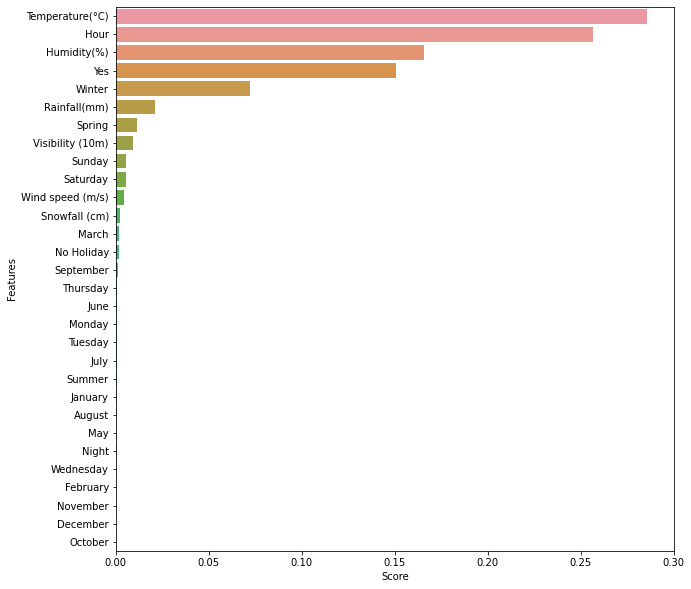

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=features['Score'],y=features['Features'])
plt.show()

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
#number of trees
n_estimators = [100,120]

#Maximum depth of tree
max_depth = [6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}


In [ ]:
gboost= GradientBoostingRegressor()
gb_grid =GridSearchCV(estimator=gboost, param_grid = param_dict,cv = 5, verbose=2)
gb_grid.fit(a_train,b_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.5s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.5s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.5s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.5s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.5s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=   1.7s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=   1.7s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=   1.8s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=   1.7s
[CV] END max_depth=6,

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 120]},
             verbose=2)

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 120}

In [ ]:
gb_boost_with_best_perams= GradientBoostingRegressor(max_depth= 8,min_samples_leaf= 40,min_samples_split = 50,n_estimators = 120)
gb_boost_with_best_perams.fit(a_train,b_train)

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50, n_estimators=120)

In [ ]:
#Gredient boost score on train data
gb_boost_with_best_perams.score(a_train,b_train)

0.9539400456545698

In [ ]:
#Gredient boost score on test data
gb_boost_with_best_perams.score(a_test,b_test)

0.9190353708501229

In [ ]:

# Performance on Test Dataset

print(f"r-square score on test data :{r2_score(b_test,gb_boost_with_best_perams.predict(a_test))}")
print(f"adjusted r-square score on test data :{1-(1-r2_score((b_test),gb_boost_with_best_perams.predict(a_test)))*((a_test.shape[0]-1)/(a_test.shape[0]-a_test.shape[1]-1))}")
print(f"homogeneity score on test data :{met.homogeneity_score(b_test,gb_boost_with_best_perams.predict(a_test))}")
print(f"mean squared error score on test data :{met.mean_squared_error(b_test,gb_boost_with_best_perams.predict(a_test))}")

r-square score on test data :0.9190353708501229
adjusted r-square score on test data :0.9176240176400727
homogeneity score on test data :0.9999999999999999
mean squared error score on test data :12.75081640857333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


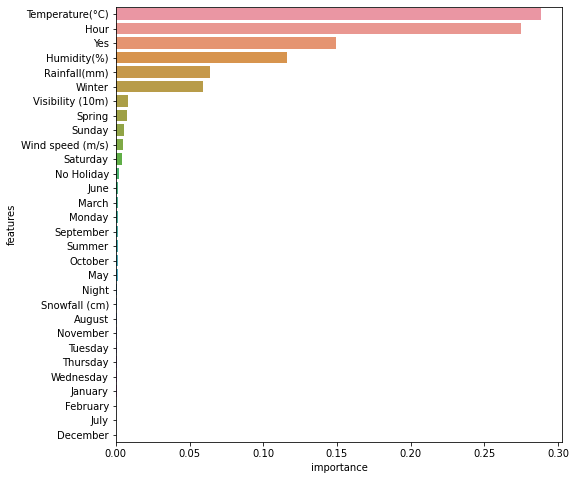

In [ ]:
plt.figure(figsize=(8,8))
features_importance_gb = pd.DataFrame({'features':a_train.columns,'importance' : gb_boost_with_best_perams.feature_importances_})
features_importance_gb.sort_values(by='importance',ascending=False,inplace=True)
sns.barplot(features_importance_gb['importance'],features_importance_gb['features'])


**Conclusion**

In project, after trying combinations of features with linear regression the model underfit. It seemed obvious because data is spread too much. It didn't seem practical to fit a line.

With Decision tree we reached at the model R squared value of 0.86. We only fitted with minimum number of leaf hyper-parameter. With default parameters it overfitted and reached R-squared at 1 with train dataset but 0.86 with test.
The Feature_importance is almost the same in both the tree based models. Gradient boost fine-tunes with error of the prior trees this is why it gets better accuracies.